In [76]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

print (tf.__version__) # 2.12.0

2.12.0


### Loading CIFAR10 dataset 

In [56]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()






In [57]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [58]:

# class names are not included, need to create them to plot the images  
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

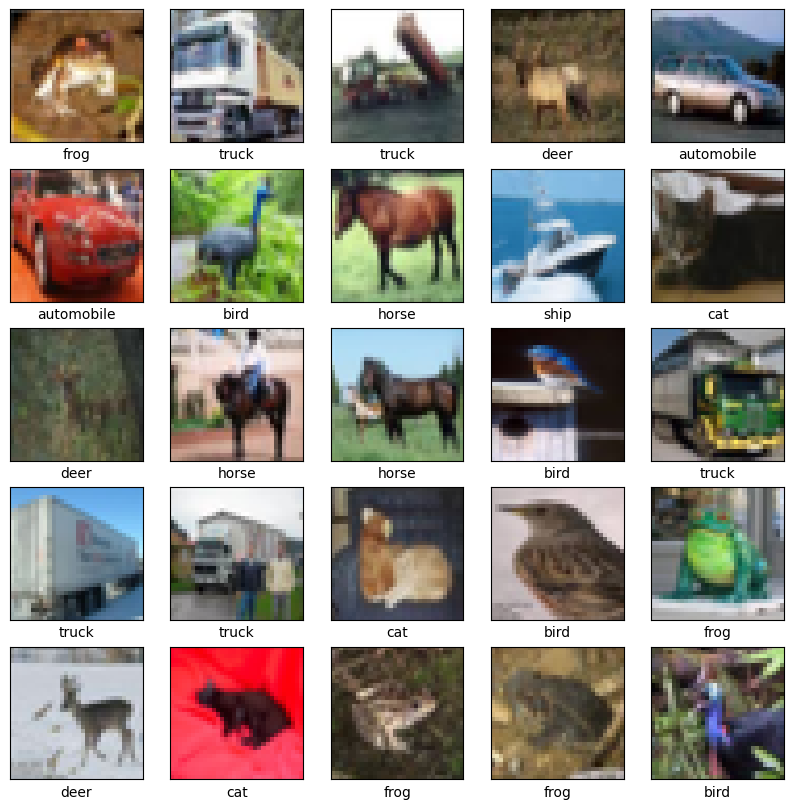

In [59]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)

	plt.xlabel(class_names[int(train_labels[i])])

### Exploring and Visualizing the data

In [60]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (50000, 32, 32, 3)
test_images: (10000, 32, 32, 3)


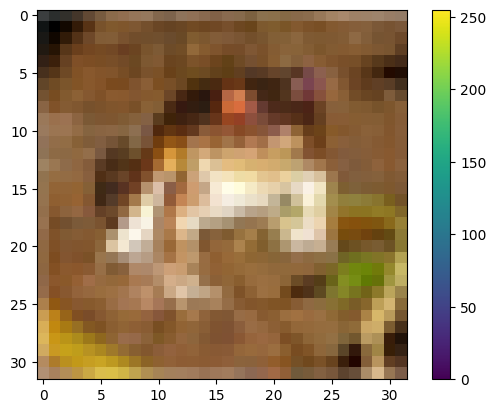

In [61]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Train classes distribution

In [62]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = train_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(train_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(train_images, train_labels)

airplane            :   5000 or 10.0%
automobile          :   5000 or 10.0%
bird                :   5000 or 10.0%
cat                 :   5000 or 10.0%
deer                :   5000 or 10.0%
dog                 :   5000 or 10.0%
frog                :   5000 or 10.0%
horse               :   5000 or 10.0%
ship                :   5000 or 10.0%
truck               :   5000 or 10.0%


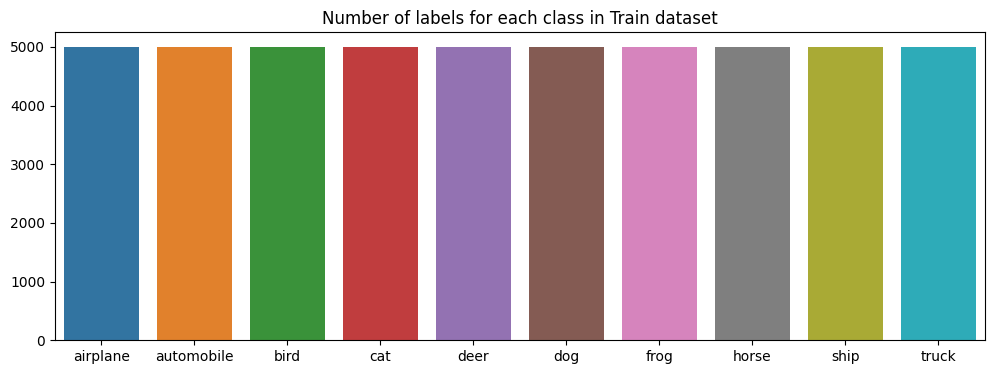

In [63]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Train dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

Test classes distribution

In [64]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = test_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(test_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(test_images, test_labels)

airplane            :   1000 or 10.0%
automobile          :   1000 or 10.0%
bird                :   1000 or 10.0%
cat                 :   1000 or 10.0%
deer                :   1000 or 10.0%
dog                 :   1000 or 10.0%
frog                :   1000 or 10.0%
horse               :   1000 or 10.0%
ship                :   1000 or 10.0%
truck               :   1000 or 10.0%


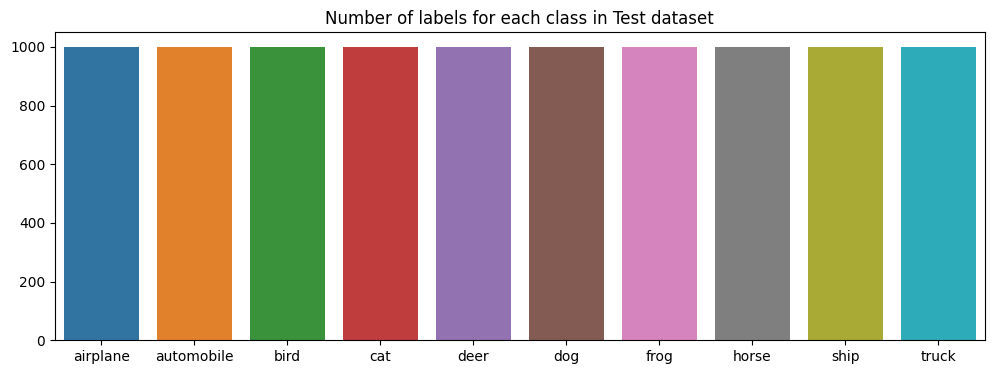

In [65]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Test dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

### Normalizing the data 

In [66]:
def data_preprocessing(images, labels):
    out_y = to_categorical(labels, 10)
    num_images = images.shape[0]
    x_shaped_array = images
    out_x = x_shaped_array / 255


    return out_x, out_y

In [67]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

In [68]:
train_images.shape

(50000, 32, 32, 3)

In [69]:
train_labels.shape

(50000, 10)

# **feature extraction**

In [83]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [84]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(32, (3, 3)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.20))

model_CNN.add(Conv2D(64, (3, 3), padding='same'))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(64, (3, 3)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.20))

model_CNN.add(Conv2D(128, (3, 3), padding='same'))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(128, (3, 3)))
model_CNN.add(Activation('relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.20))

model_CNN.add(Flatten())
model_CNN.add(Dense(512,kernel_regularizer=l2(0.01)))
model_CNN.add(Activation('relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(10))
model_CNN.add(Activation('softmax'))

In [85]:
# compile
model_CNN.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [86]:
model_CNN.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_23 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_24 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                     

In [88]:
# History
model_CNN_7l_history = model_CNN.fit(train_images, train_labels,
              batch_size=32,
              epochs=50,
              validation_data=(test_images, test_labels),
              shuffle=True)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model _ CNN_7l - test loss:", test_loss * 100)
print("Model _ CNN_7l - test accuracy:", test_acc * 100)


Epoch 1/50
1563/1563 [==============================] - 302s 191ms/step - loss: 5.5096 - accuracy: 0.3840 - val_loss: 4.0697 - val_accuracy: 0.5202
Epoch 2/50
1563/1563 [==============================] - 295s 189ms/step - loss: 3.3411 - accuracy: 0.5250 - val_loss: 2.6822 - val_accuracy: 0.5656
Epoch 3/50
1563/1563 [==============================] - 298s 190ms/step - loss: 2.2306 - accuracy: 0.5987 - val_loss: 1.9442 - val_accuracy: 0.5909
Epoch 4/50
1563/1563 [==============================] - 296s 189ms/step - loss: 1.6284 - accuracy: 0.6400 - val_loss: 1.4471 - val_accuracy: 0.6522
Epoch 5/50
1563/1563 [==============================] - 294s 188ms/step - loss: 1.2742 - accuracy: 0.6746 - val_loss: 1.0881 - val_accuracy: 0.7092
Epoch 6/50
1563/1563 [==============================] - 298s 191ms/step - loss: 1.0618 - accuracy: 0.7029 - val_loss: 0.9269 - val_accuracy: 0.7346
Epoch 7/50
1563/1563 [==============================] - 295s 189ms/step - loss: 0.9364 - accuracy: 0.7205 - val_

In [89]:
# Save model
model_CNN.save('Model _ CNN_7l_1')

INFO:tensorflow:Assets written to: Model _ CNN_7l_1\assets


INFO:tensorflow:Assets written to: Model _ CNN_7l_1\assets


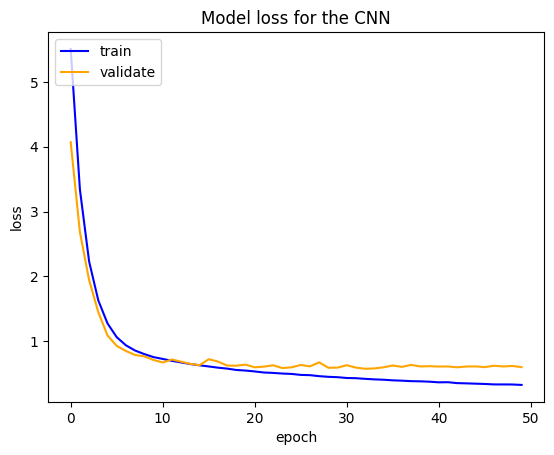

In [90]:
#Plot loss results for training data and testing data
plt.plot(model_CNN_7l_history.history['loss'], 'blue')
plt.plot(model_CNN_7l_history.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


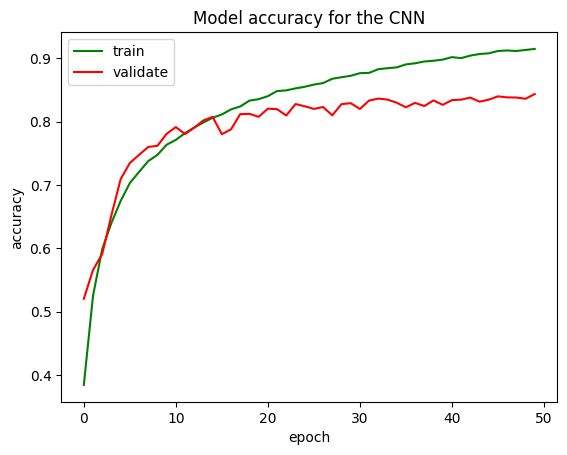

In [91]:
#Plot accuracy results for training data and testing data 
plt.plot(model_CNN_7l_history.history['accuracy'], 'green')
plt.plot(model_CNN_7l_history.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [92]:
# Load model
#model_CNN = tf.keras.models.load_model('fashion_MNIST_VGG16')


In [93]:
predictions = model_CNN.predict(test_images)

313/313 [==============================] - 16s 51ms/step


In [94]:
predictions.shape

(10000, 10)

In [106]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

C:\Users\Serhii\AppData\Local\Temp\ipykernel_11696\2789994216.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


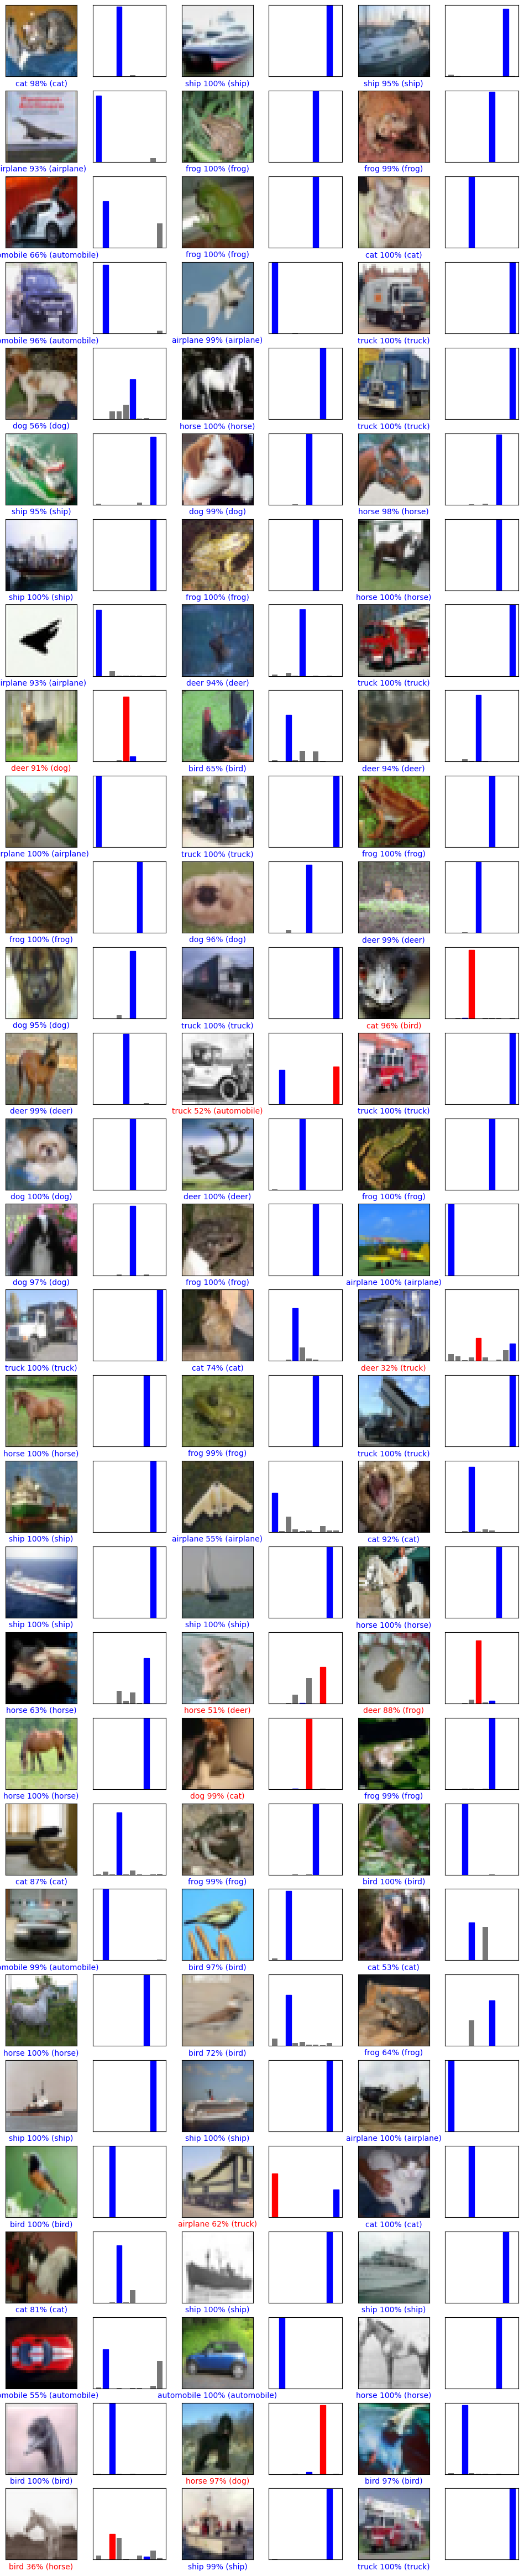

In [107]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 30
num_cols = 3
num_images = num_rows*num_cols

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with Model _ CNN_7l")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    

Висновки:
1. Присутній разбаланс по класах
